In [1]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
### Set-up - Define file location
filename = 'N-CMAPSS_DS08c-008.h5'

#### Read Raw Data

In [4]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()

# Load data
#with h5py.File('/content/drive/MyDrive/GP/N-CMAPSS_DS08c-008.h5', 'r') as hdf:
with h5py.File(filename, 'r') as hdf:

        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL
        A_test = np.array(hdf.get('A_test'))           # Auxiliary

        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))
        X_v_var = np.array(hdf.get('X_v_var'))
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))

        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))
        X_v_var = list(np.array(X_v_var, dtype='U20'))
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))

W = np.concatenate((W_dev, W_test), axis=0)
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0)
A = np.concatenate((A_dev, A_test), axis=0)

print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.028125

W shape: (6417737, 4)
X_s shape: (6417737, 14)
X_v shape: (6417737, 14)
T shape: (6417737, 10)
A shape: (6417737, 4)


In [5]:
df_A = DataFrame(data=A, columns=A_var)
df_A.describe()

,unit,cycle,Fc,hs
count,6.417737e+06,6.417737e+06,6.417737e+06,6.417737e+06
mean,5.023070e+00,2.791715e+01,2.587368e+00,3.284366e-01
std,2.835982e+00,1.598913e+01,4.923077e-01,4.696446e-01
min,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.000000e+00,1.400000e+01,2.000000e+00,0.000000e+00
50%,5.000000e+00,2.800000e+01,3.000000e+00,0.000000e+00
75%,7.000000e+00,4.100000e+01,3.000000e+00,1.000000e+00
max,1.000000e+01,6.200000e+01,3.000000e+00,1.000000e+00


###  Units Ids

In [6]:
print('Engine units in df: ', np.unique(df_A['unit']))

Engine units in df:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [7]:
df_W = DataFrame(data=W, columns=W_var)
df_W['unit'] = df_A['unit'].values

In [8]:
df_T = DataFrame(data=T, columns=T_var)
df_T['unit'] = df_A['unit'].values
df_T['cycle'] = df_A['cycle'].values
df_Ts = df_T.drop_duplicates()
df_Ts.describe()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,-0.002434,-0.003002,-0.002229,-0.002531,-0.001850,-0.002334,-0.002028,-0.002213,-0.002228,-0.002173,5.640145,28.358047
std,0.003832,0.003582,0.003071,0.003126,0.002138,0.003120,0.002172,0.002618,0.002695,0.002680,2.858178,16.333875
min,-0.039840,-0.026994,-0.030470,-0.025556,-0.016764,-0.028337,-0.015859,-0.025330,-0.021040,-0.025745,1.000000,1.000000
25%,-0.002488,-0.003488,-0.002528,-0.003023,-0.002089,-0.002827,-0.002292,-0.002815,-0.002275,-0.002731,3.000000,14.000000
50%,-0.001249,-0.001566,-0.001266,-0.001305,-0.001158,-0.001245,-0.001297,-0.001308,-0.001303,-0.001319,6.000000,28.000000
75%,-0.000813,-0.000976,-0.000676,-0.000795,-0.000734,-0.000722,-0.000805,-0.000909,-0.000893,-0.000724,8.000000,42.000000
max,-0.000163,-0.000161,0.000112,-0.000014,0.000160,0.000063,-0.000078,0.000001,-0.000053,0.000139,10.000000,62.000000


In [9]:
df_X_s = DataFrame(data=X_s, columns=X_s_var)

In [10]:
df_X_v = DataFrame(data=X_v, columns=X_v_var)

In [11]:
Y_var = ['RUL']
Y = DataFrame(data=Y, columns=Y_var)
print(Y)

         RUL
0         52
1         52
2         52
3         52
4         52
...      ...
6417732    0
6417733    0
6417734    0
6417735    0
6417736    0

[6417737 rows x 1 columns]


In [12]:
df_A = DataFrame(data=A, columns=A_var)
print(df_A)

         unit  cycle   Fc   hs
0         1.0    1.0  3.0  1.0
1         1.0    1.0  3.0  1.0
2         1.0    1.0  3.0  1.0
3         1.0    1.0  3.0  1.0
4         1.0    1.0  3.0  1.0
...       ...    ...  ...  ...
6417732  10.0   54.0  2.0  0.0
6417733  10.0   54.0  2.0  0.0
6417734  10.0   54.0  2.0  0.0
6417735  10.0   54.0  2.0  0.0
6417736  10.0   54.0  2.0  0.0

[6417737 rows x 4 columns]


In [13]:
W = DataFrame(data=W, columns=W_var)
print(W)

            alt      Mach        TRA          T2
0        3008.0  0.350658  78.222099  520.434430
1        3014.0  0.350658  78.222099  520.413179
2        3022.0  0.351540  77.782646  520.445512
3        3027.0  0.351036  77.255310  520.391947
4        3038.0  0.352233  76.640076  520.438472
...         ...       ...        ...         ...
6417732  3015.0  0.212625  42.275089  512.509382
6417733  3012.0  0.211302  42.890320  512.464381
6417734  3009.0  0.210924  43.153988  512.459609
6417735  3006.0  0.211428  43.241879  512.490731
6417736  3003.0  0.210420  43.241879  512.458975

[6417737 rows x 4 columns]


In [14]:
X_s = DataFrame(data=X_s, columns=X_s_var)
print(X_s)

                T24          T30          T48          T50        P15  \
0        623.703671  1497.961251  1905.748847  1297.155519  19.670090   
1        623.705184  1497.934281  1905.456402  1296.867930  19.667190   
2        623.519509  1496.404431  1901.169747  1294.120319  19.652891   
3        622.971839  1494.224129  1896.979472  1292.042214  19.613403   
4        622.443958  1491.877763  1892.301787  1289.679165  19.579963   
...             ...          ...          ...          ...        ...   
6417732  580.874265  1336.311772  1632.337827  1190.588776  16.690469   
6417733  581.322145  1338.902762  1638.919473  1194.172451  16.710928   
6417734  581.779327  1339.878239  1638.680086  1192.984508  16.731720   
6417735  581.944856  1340.229350  1638.928107  1192.902754  16.741151   
6417736  581.960862  1340.190693  1638.491518  1192.557075  16.740336   

                P2        P21        P24        Ps30         P40        P50  \
0        14.300144  19.969635  25.048474  41

In [15]:
X_v = DataFrame(data=X_v, columns=X_v_var)
print(X_v)

                 T40         P30        P45          W21         W22  \
0        2922.670410  446.566601  79.642705  2909.015786  281.774220   
1        2922.204408  446.496395  79.631926  2908.855686  281.747607   
2        2915.819615  444.883835  79.343477  2905.943034  281.083262   
3        2909.812702  442.610037  78.922151  2898.196414  279.949103   
4        2903.092301  440.208639  78.476202  2891.552359  278.800265   
...              ...         ...        ...          ...         ...   
6417732  2522.668741  295.590414  51.983861  2200.499236  202.129478   
6417733  2532.467463  297.725462  52.366645  2206.662453  203.037711   
6417734  2531.772544  298.436058  52.506505  2212.126321  203.601732   
6417735  2532.052011  298.705314  52.558108  2214.367746  203.748488   
6417736  2531.350813  298.658300  52.551663  2213.973238  203.736069   

                W25        W31        W32         W48         W50      SmFan  \
0        281.768995  32.792713  19.675628  267.405904  

In [24]:
import pandas as pd
df_combined = pd.concat([ X_v , X_s ,W, df_A,Y], axis=1)
df_combined


,T40,P30,P45,W21,W22,W25,W31,W32,W48,W50,...,Wf,alt,Mach,TRA,T2,unit,cycle,Fc,hs,RUL
0,2922.670410,446.566601,79.642705,2909.015786,281.774220,281.768995,32.792713,19.675628,267.405904,282.902559,...,5.065123,3008.0,0.350658,78.222099,520.434430,1.0,1.0,3.0,1.0,52
1,2922.204408,446.496395,79.631926,2908.855686,281.747607,281.744002,32.789760,19.673856,267.383823,282.879998,...,5.062908,3014.0,0.350658,78.222099,520.413179,1.0,1.0,3.0,1.0,52
2,2915.819615,444.883835,79.343477,2905.943034,281.083262,281.060583,32.709031,19.625419,266.707656,282.173395,...,5.030290,3022.0,0.351540,77.782646,520.445512,1.0,1.0,3.0,1.0,52
3,2909.812702,442.610037,78.922151,2898.196414,279.949103,279.947809,32.577585,19.546551,265.619700,281.025964,...,4.993672,3027.0,0.351036,77.255310,520.391947,1.0,1.0,3.0,1.0,52
4,2903.092301,440.208639,78.476202,2891.552359,278.800265,278.790274,32.440851,19.464511,264.485664,279.828996,...,4.954148,3038.0,0.352233,76.640076,520.438472,1.0,1.0,3.0,1.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6417732,2522.668741,295.590414,51.983861,2200.499236,202.129478,202.057170,23.376753,14.026052,189.889384,200.992614,...,2.887059,3015.0,0.212625,42.275089,512.509382,10.0,54.0,2.0,0.0,0
6417733,2532.467463,297.725462,52.366645,2206.662453,203.037711,203.050891,23.494137,14.096482,190.887040,202.047627,...,2.922004,3012.0,0.211302,42.890320,512.464381,10.0,54.0,2.0,0.0,0
6417734,2531.772544,298.436058,52.506505,2212.126321,203.601732,203.573422,23.555861,14.133516,191.368564,202.560342,...,2.925543,3009.0,0.210924,43.153988,512.459609,10.0,54.0,2.0,0.0,0
6417735,2532.052011,298.705314,52.558108,2214.367746,203.748488,203.738608,23.575373,14.145224,191.529303,202.733223,...,2.927910,3006.0,0.211428,43.241879,512.490731,10.0,54.0,2.0,0.0,0


In [17]:
from sklearn.model_selection import train_test_split

#Specifying the Features and predicters
X = df_combined.drop('RUL', axis=1)
y = df_combined['RUL']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

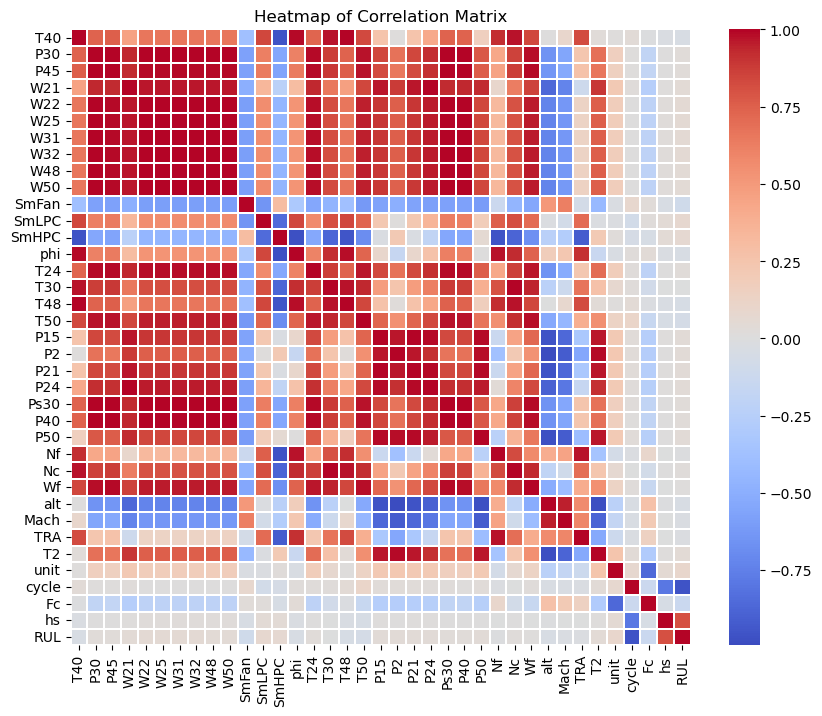

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_combined is your combined DataFrame
# Compute the correlation matrix
correlation_matrix = df_combined.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=.1)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [19]:
df_new = pd.DataFrame([])
for i in range(len(df_combined.columns)):
    if(np.abs(correlation_matrix.iloc[i,-1])>0.05):
        df_new[df_combined.columns[i]] = df_combined.iloc[:,i]
df_new

,W22,W25,W31,W32,SmFan,SmLPC,SmHPC,T50,unit,cycle,Fc,hs,RUL
0,281.774220,281.768995,32.792713,19.675628,15.143574,10.527448,24.708675,1297.155519,1.0,1.0,3.0,1.0,52
1,281.747607,281.744002,32.789760,19.673856,15.145641,10.522569,24.717277,1296.867930,1.0,1.0,3.0,1.0,52
2,281.083262,281.060583,32.709031,19.625419,15.165525,10.457543,24.826207,1294.120319,1.0,1.0,3.0,1.0,52
3,279.949103,279.947809,32.577585,19.546551,15.183597,10.421969,24.895348,1292.042214,1.0,1.0,3.0,1.0,52
4,278.800265,278.790274,32.440851,19.464511,15.227248,10.383177,24.979482,1289.679165,1.0,1.0,3.0,1.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6417732,202.129478,202.057170,23.376753,14.026052,13.594608,8.527565,28.696795,1190.588776,10.0,54.0,2.0,0.0,0
6417733,203.037711,203.050891,23.494137,14.096482,13.609039,8.567058,28.509489,1194.172451,10.0,54.0,2.0,0.0,0
6417734,203.601732,203.573422,23.555861,14.133516,13.618704,8.527121,28.595775,1192.984508,10.0,54.0,2.0,0.0,0
6417735,203.748488,203.738608,23.575373,14.145224,13.631435,8.500729,28.603258,1192.902754,10.0,54.0,2.0,0.0,0


In [20]:
from sklearn.model_selection import train_test_split

#Specifying the Features and predicters
X = df_new.drop('RUL', axis=1)
y = df_new['RUL']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [22]:
y_pred = regressor.predict(X_test)
y_pred

array([ 5., 31., 46., ..., 23., 43.,  6.])

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 7.393568452445872e-06
R-squared: 0.9999999710324902


In [25]:
### original without dropping 
X = df_combined.drop('RUL', axis=1)
y = df_combined['RUL']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [27]:
y_pred = regressor.predict(X_test)
y_pred

array([ 5., 31., 46., ..., 23., 43.,  6.])

In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 1.1148784463066436e-05
R-squared: 0.9999999563198033
